# ML Trader

In [1]:
from utils.packages import *
from utils.variables import *
from utils.i_o import *
from utils.dir_slope import *
from utils.engine import *
from utils.loops import *
from utils.order import *
import winsound
from tqdm import tqdm
tqdm.pandas()

In [2]:
# data["plot"] = True

# data['min_llema_angle'] = 1

# data['pl_move_trail_trigger']       = 0.0040
# data['stop_loss_pip']               = -0.0040

# data['take_profit_method']  = 'simple'
# data['stop_loss_method']    = 'simple'

# data['start_date'] = {'year':2021, 'month':1, 'date':1}
# data['end_date']   = {'year':2021, 'month':1, 'date':5}

In [3]:
%%time
data = get_date_list(data)
data = read_data(data)
data = run_engine(data)

 89%|████████████████████████████▍   | 411253/462330 [00:39<00:06, 7524.46it/s]

pls   -0.00047
dtype: float64
--------------------------------------
                 date ord_types               close_type      pls
0 2021-05-12 00:22:00      long  simple_slema_move_close  0.00115
1 2021-05-12 00:48:33      long               sema_close -0.00007
2 2021-05-13 06:45:43     short  simple_slema_move_close  0.00462
3 2021-05-13 08:47:42     short               sema_close  0.00241
4 2021-05-13 08:47:47      long               sema_close -0.00004
5 2021-05-13 13:55:29     short               sema_close -0.00253
6 2021-05-13 15:57:55      long             reverse_stop -0.00301
7 2021-05-14 05:48:16     short              simple_stop -0.00300


100%|███████████████████████████████| 462330/462330 [00:44<00:00, 10336.69it/s]

Wall time: 1min 7s


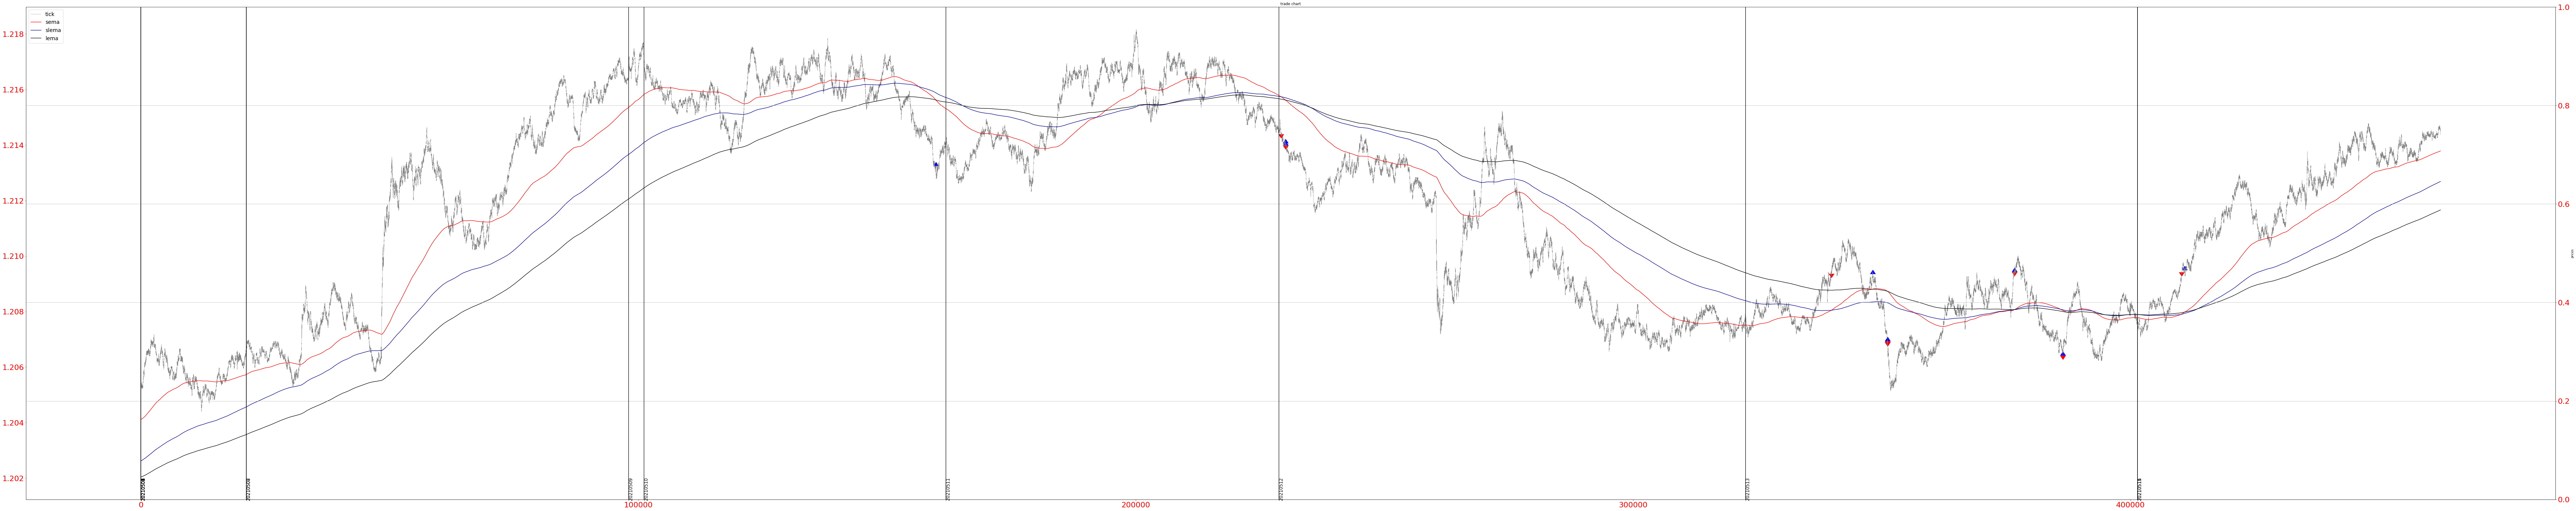

-----------------------------------------------------
date_val          : ['20210501', '20210502', '20210503', '20210504', '20210505', '20210506', '20210507', '20210508', '20210509', '20210510', '20210511', '20210512', '20210513', '20210514', '20210515']
Total PL : -0.00047000000000000123
-------------
net_pl            : -0.00047/0.01683
-------------
+ve               : num= 3    sum= +0.00818    avg= +0.00273
-ve               : num= 5    sum= -0.00865    avg= -0.00173
-----------------------------------------------------
month_val
5   -0.00047
Name: pls, dtype: float64
-----------------------------------------------------
sema_close                 4
simple_slema_move_close    2
reverse_stop               1
simple_stop                1
Name: close_type, dtype: int64
-----------------------------------------------------


In [4]:
if data["plot"]:
    data = adjust_plot_list_lengths(data)
    plot_graph(data)
    
print('-----------------------------------------------------')
print_report(data)
print('-----------------------------------------------------')
print(data['report_df'].groupby(['month_val'])['pls'].sum())
print('-----------------------------------------------------')
print(data['report_df']['close_type'].value_counts())
print('-----------------------------------------------------')
data['report_df']

winsound.PlaySound('C:\\Windows\\Media\\tada.wav', winsound.SND_ASYNC)

import glob

for file in glob.glob("data/*.csv"):
    if file not in ['data\\eurusd_2021.csv', 'data\\full_df.csv']:
        df = pd.read_csv(file)
        print('----------------------------')
        print(f'file : {file}')
        print(df['pls'].sum())
        print(df.groupby(['month_val'])['pls'].sum())
        print('----------------------------')